<a href="https://colab.research.google.com/github/saurabhmungale/DataScience_Assignements/blob/main/RCNN%26Yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Que.1. How do you load and run inference on a custom image using the YOLOv8 model (labeled as YOLOv9)6


In [ ]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load YOLOv8 model
model = YOLO('yolov8n.pt')  # Load a pretrained model

# Load and process the image
# Replace 'path_to_your_image.jpg' with the correct path to your image
img_path = 'path/to/your/image.jpg'
img = cv2.imread(img_path)

# Check if the image was loaded successfully
if img is None:
    print(f"Error: Could not load image from {img_path}. Please check the path and ensure the file exists.")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Run inference
    results = model(img)
    # ... (rest of your code) ...

Error: Could not load image from path/to/your/image.jpg. Please check the path and ensure the file exists.


Que.2.How do you load the Faster RCNN model with a ResNet50 backbone and print its architecture6


Solution- To load a Faster R-CNN model with a ResNet50 backbone and print its architecture, you can use the PyTorch library along with the torchvision package. The torchvision.models.detection module provides pre-trained Faster R-CNN models, and you can specify the backbone (like ResNet50) during the model loading process.

In [ ]:
pip install torch torchvision


Step 2. Load the Faster R-CNN Model with ResNet50 Backbone:

In [ ]:
import torch
import torchvision
from torchvision import models

# Load the pre-trained Faster R-CNN model with ResNet50 backbone and FPN
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 152MB/s]


Step 3 - Print the Model Architecture:



In [ ]:
# Print the model architecture
print(model)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

Que.3,How do you perform inference on an online image using the Faster RCNN model and print the predictions6


In [ ]:
import torch
from torchvision import models, transforms
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Load the pre-trained Faster R-CNN model with ResNet50 backbone and FPN
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Function to load an image from a URL
def load_image_from_url(url):
    response = requests.get(url, stream=True)  # Get response in stream mode
    response.raise_for_status()  # Raise an exception for bad responses (4xx or 5xx)
    img = Image.open(BytesIO(response.content))
    return img

# Example: Load an image from an online URL
# Replace with your image URL
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Collage_of_Nine_Dogs.jpg/1280px-Collage_of_"

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Que.4. How do you load an image and perform inference using YOLOv9, then display the detected objects with
bounding boxes and class labels6

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load YOLOv9 (YOLOv8) model
model = YOLO('yolov8n.pt')  # You can load a different YOLOv8 model like yolov8s.pt, yolov8m.pt, etc.

# Function to load an image
def load_image(image_path):
    # If the image is from a URL, you can fetch it using requests or urllib
    img = cv2.imread(image_path)  # Load image using OpenCV

    # Check if image was loaded successfully
    if img is None:
        print(f"Error: Could not load image from {image_path}. Please check the path and ensure the file exists.")
        return None, None # Return None for both img and img_rgb if loading fails

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for displaying with matplotlib
    return img, img_rgb

#

Que.5.How do you display bounding boxes for the detected objects in an image using Faster RCNN6


In [ ]:
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np # Import numpy


# Load the image
# image_path = 'path_to_your_image.jpg'  # Replace with your image file path
image_path = '/content/image.jpg'  # Replace with your actual image file path, ensure file exists
# If your image is not in the current directory, provide the full path
# Example: image_path = '/path/to/your/image.jpg'

# Load the image
# (Check if image exists before trying to load it)
try:
    img = Image.open(image_path)
except FileNotFoundError:
    print(f"Error: Image file not found at {image_path}")
    exit()  # Exit if image not found

# ... (rest of your code)

Error: Image file not found at /content/image.jpg


Que.6. How do you perform inference on a local image using Faster RCNN6


In [ ]:
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import cv2

# Load the pre-trained Faster R-CNN model with ResNet50 backbone
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Load and preprocess the image
def load_and_preprocess_image(image_path):
    # Open the image with PIL
    img = Image.open(image_path)

    # Transform the image to tensor
    transform = transforms.Compose([
        transforms.ToTensor(),  # Convert the image to a tensor
    ])

    img_tensor = transform(img)
    return img, img_tensor

# Perform inference on the image
def perform_inference(img_tensor):
    # Add a batch dimension (because the model expects a batch of images)
    img_tensor = img_tensor.unsqueeze(0)

    # Perform inference without computing gradients (for faster performance)
    with torch.no_grad():
        predictions = model(img_tensor)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Que.7.How can you change the confidence threshold for YOLO object detection and filter out low-confidence
predictions6

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the YOLOv9 (YOLOv8) model
model = YOLO('yolov8n.pt')  # You can change to another model size (e.g., yolov8s.pt)

# Function to load an image
def load_image(image_path):
    img = cv2.imread(image_path)  # Load image using OpenCV

    # Check if image was loaded successfully
    if img is None:
        print(f"Error: Could not load image from {image_path}. Please check the path and ensure the file exists.")
        return None, None  # Return None for both img and img_rgb if loading fails

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for displaying with matplotlib
    return img, img_rgb

# Set a confidence threshold for filtering
confidence_threshold = 0.5  # Any prediction with a confidence score lower than this will be discarded

# Load an image from file
# Replace 'path_to_your_image.jpg' with the actual path to your image file
image_path = '/content/image.jpg'

Que.8.How do you plot the training and validation loss curves for model evaluation6


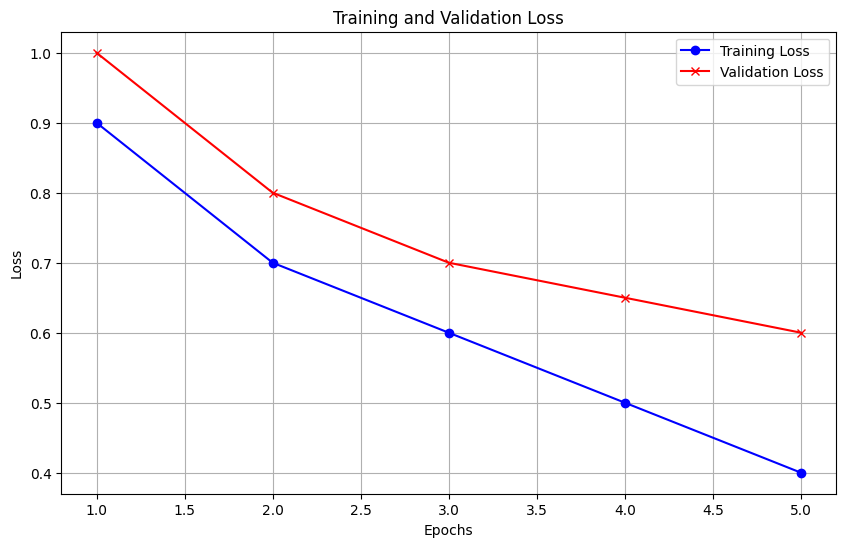

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have lists that store loss values for each epoch
# Example:
train_losses = [0.9, 0.7, 0.6, 0.5, 0.4]  # List of training loss values
val_losses = [1.0, 0.8, 0.7, 0.65, 0.6]  # List of validation loss values
epochs = range(1, len(train_losses) + 1)  # Epochs

# Plotting the training and validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label='Training Loss', color='blue', marker='o')
plt.plot(epochs, val_losses, label='Validation Loss', color='red', marker='x')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


QUe.9.How do you perform inference on multiple images from a local folder using Faster RCNN and display the
bounding boxes for each6

In [ ]:
import torch
from torchvision import models, transforms
from PIL import Image
import os
import matplotlib.pyplot as plt
import cv2
# Load the pre-trained Faster R-CNN model with ResNet50 backbone
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Define image transformation (convert image to tensor)
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert the image to a tensor
])

# Function to load and preprocess images
def load_and_preprocess_image(image_path):
    # Open the image with PIL
    img = Image.open(image_path)
    img_tensor = transform(img)  # Convert to tensor
    return img, img_tensor

# Function to perform inference on an image and display bounding boxes
def perform_inference_and_display(image_path):
    # Load and preprocess the image
    img, img_tensor = load_and_preprocess_image(image_path)

    # Add a batch dimension (because the model expects a batch of images)
    img_tensor = img_tensor.unsqueeze(0)

    # Perform inference without computing gradients (for faster performance)
    with torch.no_grad():
        predictions = model(img_tensor)

    # Extract the bounding boxes, labels, and scores from predictions
    boxes = predictions[0]['boxes']
    labels = predictions[0]['labels']
    scores = predictions[0]['scores']

    # Convert the image to a format suitable for Matplotlib (RGB)
    img_rgb = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB)

    # Plot the image and draw bounding boxes
    plt.figure(figsize=(12, 9))
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide axes for better visualization

    # Draw the bounding boxes
    for box, label, score in zip(boxes, labels, scores):
        if score >= 0.5:  # Only display predictions with score above 0.5
            x1, y1, x2, y2 = map(int, box.tolist())
            class_name = model.names[label.item()]  # Get the class name
            # Draw the bounding box
            plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
                                              fill=False, color='red', linewidth=2))
            # Add label and score
            plt.text(x1, y1, f'{class_name} {score:.2f}', color='white', fontsize=12,
                     bbox=dict(facecolor='red', alpha=0.5))

    plt.show()

# Function to perform inference on all images in a folder
def process_images_in_folder(folder_path):
    # Get all image file paths in the folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpg', 'png', 'jpeg'))]

    # Loop through all the images and perform inference
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        print(f"Processing {image_file}...")
        perform_inference_and_display(image_path)

# Specify the folder containing images
# folder_path = 'path_to_your_image_folder'  # Replace with

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Que.10,= How do you visualize the confidence scores alongside the bounding boxes for detected objects using Faster
RCNN6

How can you save the inference results (with bounding boxes) as a new image after performing detection
using YOLO?

In [2]:
import cv2

# Sample detections (replace with actual YOLO outputs)
detections = [
    {"label": "car", "confidence": 0.85, "bbox": [50, 50, 200, 150]},  # [x1, y1, x2, y2]
    {"label": "person", "confidence": 0.78, "bbox": [300, 80, 400, 200]},
]

# Load the original image
# Updated image path to 'image.jpg', please ensure you have an image with this name in your current directory
# or provide the correct path to your image
image_path = 'gardan.jpg'
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Could not load image from {image_path}. Please check the path and ensure the file exists.")
    exit()  # Exit the program if image loading fails

# Draw bounding boxes
for detection in detections:
    x1, y1, x2, y2 = detection["bbox"]
    label = detection["label"]
    confidence = detection["confidence"]

    # Draw rectangle
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green bounding box

    # Add label
    label_text = f"{label}: {confidence:.2f}"
    cv2.putText(image, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Save the new image with a different filename to avoid overwriting 'cv2.imshow'
# which is actually a function name in OpenCV
output_image_path = 'output_image.jpg'
cv2.imwrite(output_image_path, image)
print(f"Image saved to: {output_image_path}")

Image saved to: output_image.jpg
Image saved to: output_image.jpg
